## tf.keras.datasets.mnist.load_data
    - x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.
    - y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
    - x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.
    - y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

- 28*28 =784개
- 0 ~ 284개의 숫자로 되어있다
- 284일수록 검정색(어두은색)으로 되어있다 

In [27]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sys


In [28]:
seed =0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('학습셋 이미지 수 : %d 개' %(X_train.shape[0]))
print('테스트셋 이미지 수 : %d 개'%(X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


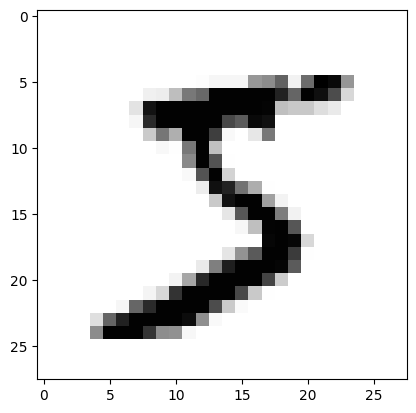

In [29]:
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [30]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


- np.utils : 
    - 케라스(Keras)의 to_categorical() 함수는 정수형(integer) 클래스 레이블(label)을 원-핫 인코딩(one-hot encoding) 벡터로 변환하는 함수입니다.
    - 음수값을 클래스 레이블로 가지고 있으면 오류가 나기 때문에 to_categorical 함수를 사용하기 전에 클래스 레이블을 확인하고 음수 값이 없는지 확인하는 것이 좋습니다.

In [31]:
## 28*28 2차원 데이터를 784개의 1차원 데이터로 바꿔주기
## 차원 변환 과정(2차원--> 1차원)
## 255로 나누는 이유: 0~1안으로 범위를 바꿔줄려고(정규화)
X_train= X_train.reshape(X_train.shape[0], 784).astype('float64')/255
X_test= X_test.reshape(X_test.shape[0], 784).astype('float64')/255

In [32]:
## 멀티 분류에서 엔트로피 계산하기 위해서 원-핫 인코딩

print('class: %d' %(Y_train[0]))

Y_train= tf.keras.utils.to_categorical(Y_train,10)
Y_test= tf.keras.utils.to_categorical(Y_test,10)
print(Y_train[0])

class: 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [33]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint,EarlyStopping






In [34]:
seed =0
np.random.seed(seed)
tf.random.set_seed(3)

## 전처리
(X_train,Y_train),(X_test,Y_test)= mnist.load_data()
X_train= X_train.reshape(X_train.shape[0], 784).astype('float64')/255
X_test= X_test.reshape(X_test.shape[0], 784).astype('float64')/255
Y_train= tf.keras.utils.to_categorical(Y_train,10)
Y_test= tf.keras.utils.to_categorical(Y_test,10)

## 모델
model= Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))

## 모델 실행 환경
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
## 모델 저장, 모델 최적화 단계에서 early stop

MODEL_DIR= './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                             verbose=1,save_best_only=True)
early_stopping_callback =EarlyStopping(monitor='val_loss',patience=10)

In [36]:
history= model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=200,verbose=0,
                   callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.15000, saving model to ./model\01-0.1500.hdf5

Epoch 2: val_loss improved from 0.15000 to 0.10350, saving model to ./model\02-0.1035.hdf5

Epoch 3: val_loss improved from 0.10350 to 0.08850, saving model to ./model\03-0.0885.hdf5

Epoch 4: val_loss improved from 0.08850 to 0.07521, saving model to ./model\04-0.0752.hdf5

Epoch 5: val_loss did not improve from 0.07521

Epoch 6: val_loss improved from 0.07521 to 0.06702, saving model to ./model\06-0.0670.hdf5

Epoch 7: val_loss improved from 0.06702 to 0.06379, saving model to ./model\07-0.0638.hdf5

Epoch 8: val_loss improved from 0.06379 to 0.06086, saving model to ./model\08-0.0609.hdf5

Epoch 9: val_loss did not improve from 0.06086

Epoch 10: val_loss improved from 0.06086 to 0.06077, saving model to ./model\10-0.0608.hdf5

Epoch 11: val_loss did not improve from 0.06077

Epoch 12: val_loss did not improve from 0.06077

Epoch 13: val_loss did not improve from 0.06077

Epoch 14: val_loss did 

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

313/313 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9827

 Test Accuracy: 0.9827


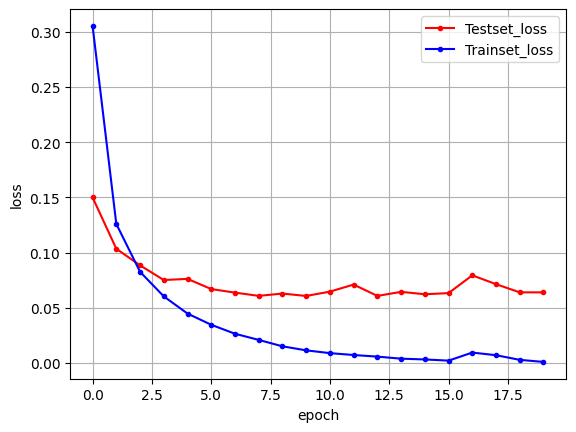

In [39]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test,Y_test)[1]))

# 테스트셋 오차
y_vloss= history.history['val_loss']

# 트레인셋 오차
y_loss= history.history['loss']

# 그래프
X_len=np.arange(len(y_loss))
plt.plot(X_len, y_vloss, marker='.', c='red', label= 'Testset_loss')
plt.plot(X_len, y_loss, marker='.', c='blue', label= 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()